<a href="https://colab.research.google.com/github/Makcoder09/RNSIT/blob/main/akshay_AIMLhackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!wget  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
!head -n 25 processed.cleveland.data

--2022-05-29 10:18:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘processed.cleveland.data.1’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.05s   

2022-05-29 10:18:01 (366 KB/s) - ‘processed.cleveland.data.1’ saved [18461/18461]

63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [43]:
names=['age','sex','cp','trestbps','chol','fbs','restecg','thalac','exang','oldpeak','slope','ca','thal','num']
df_cleve=pd.read_csv('processed.cleveland.data',header=None,names=names,na_values=['?','?'], encoding='latin1',sep=',')

In [44]:
df_cleve

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [45]:
df_cleve.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [46]:

df_cleve.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [47]:
df_cleve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalac    303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [48]:
df_cleve.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [75]:
df_cleve.isnull().sum()
df_cleve=df_cleve.dropna()


In [76]:
df_cleve.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalac      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


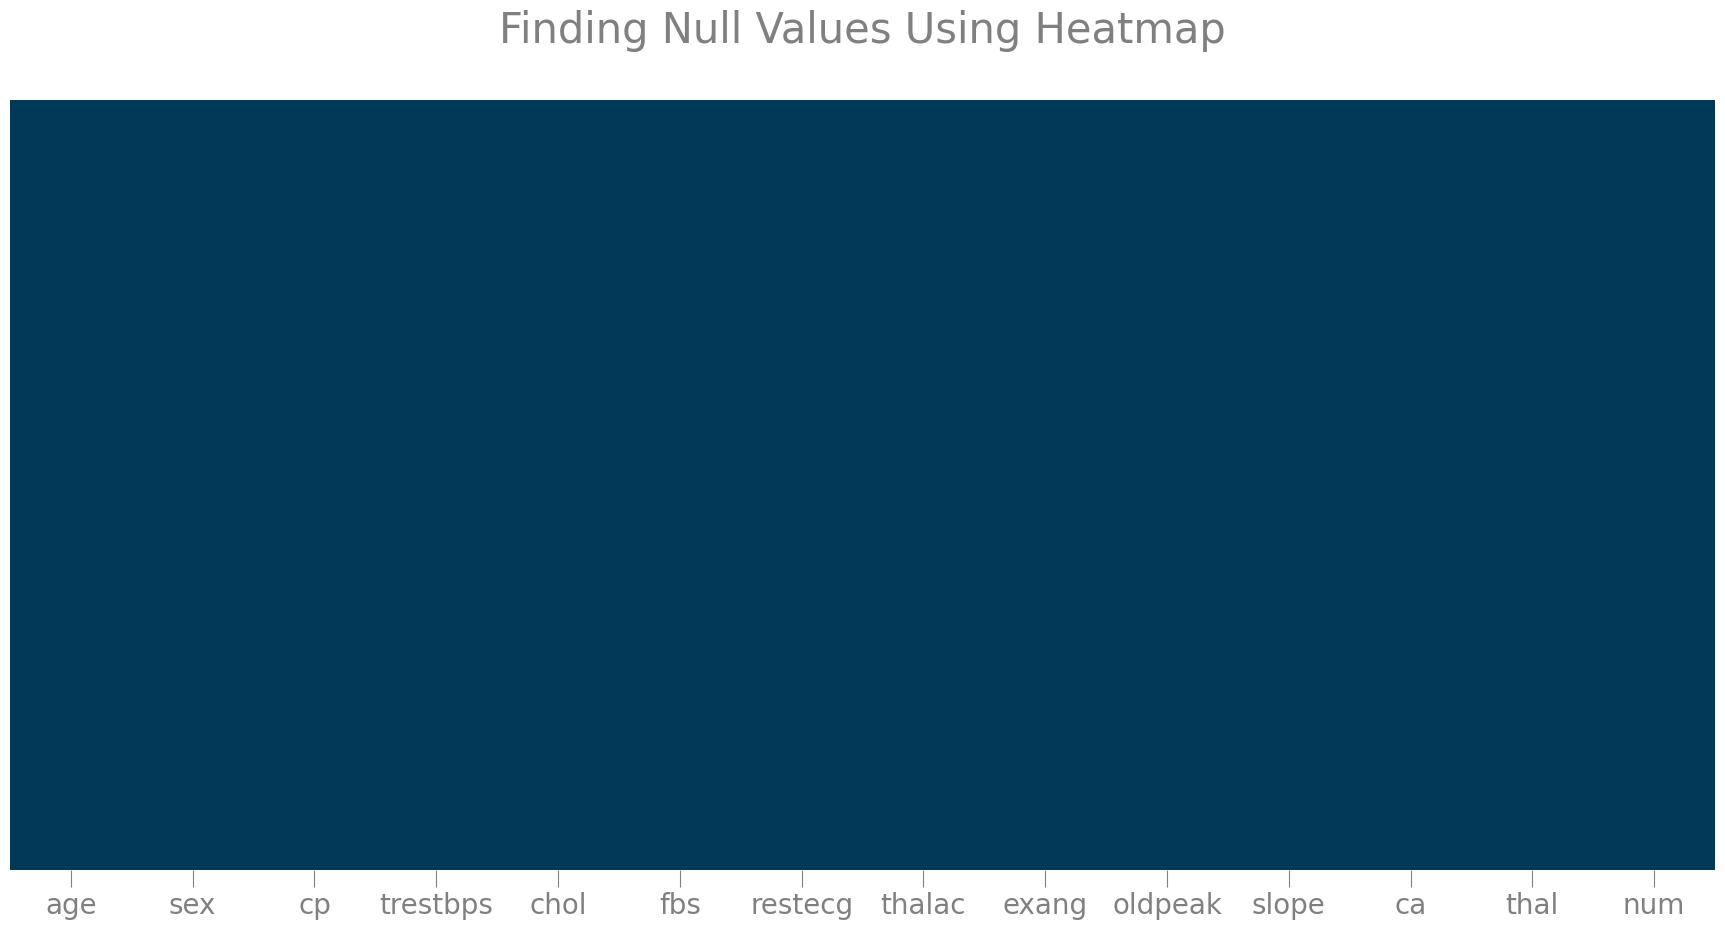

In [77]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(df_cleve.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )
df_cleve.fillna(1)
df_cleve.dropna()

In [78]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [69]:
import pandas_profiling as pp



In [80]:
df = df_cleve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7     thalac  219.883557
11        ca  107.213553
9    oldpeak   98.505523
12      thal   70.520283
8      exang   39.119182
4       chol   38.167452
0        age   27.975233
3   trestbps   19.348090
2         cp   16.383180
6    restecg   13.026434
10     slope   10.178421
1        sex    7.511646


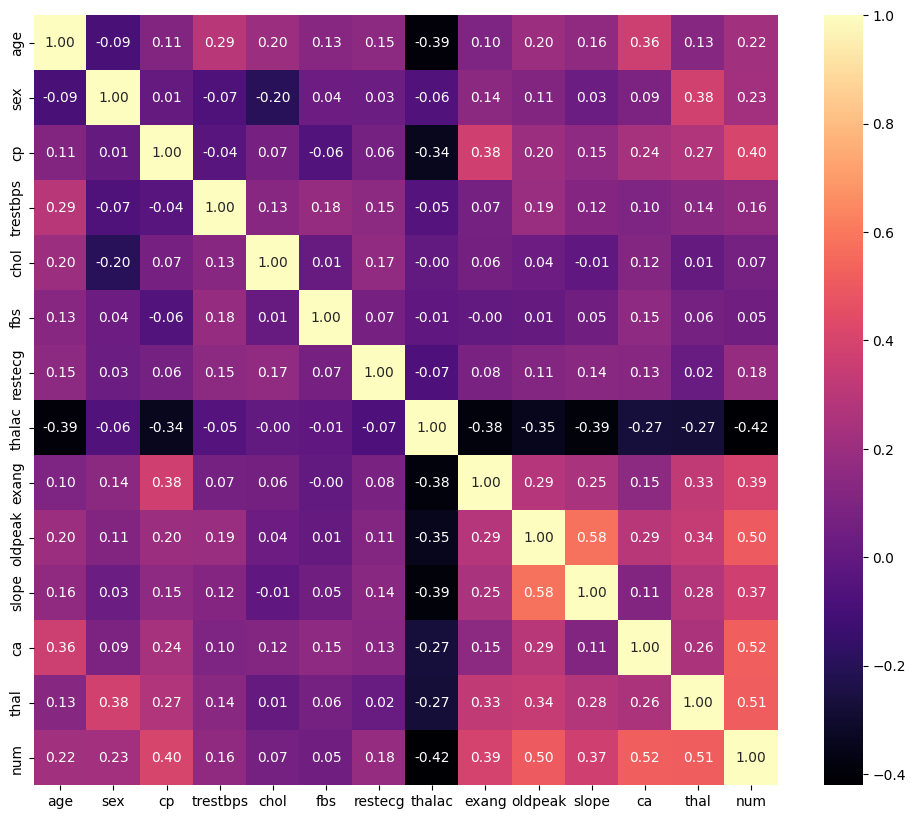

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [94]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [98]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)


In [100]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['num'] = df2['num'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s num\n')

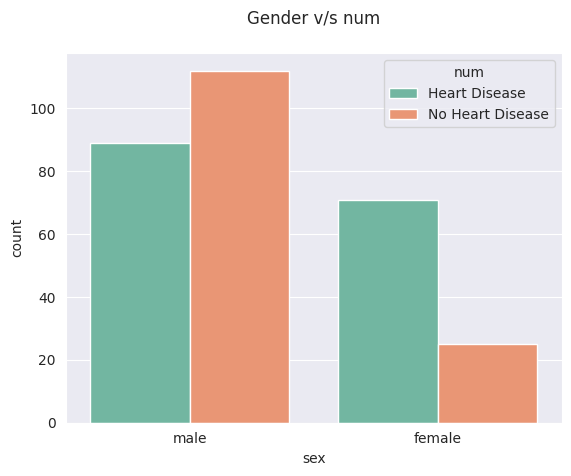

In [101]:
sns.countplot(data= df2, x='sex',hue='num')
plt.title('Gender v/s num\n')

Text(0.5, 1.0, 'Chest Pain Type v/s num\n')

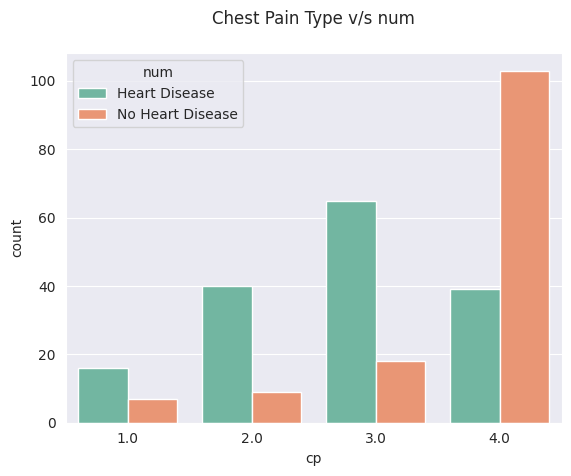

In [102]:
sns.countplot(data= df2, x='cp',hue='num')
plt.title('Chest Pain Type v/s num\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


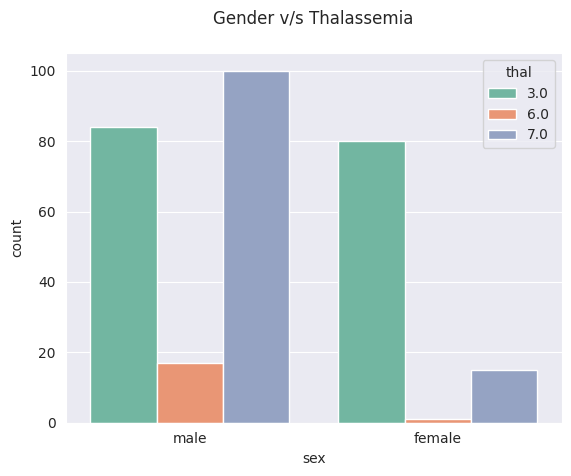

In [103]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

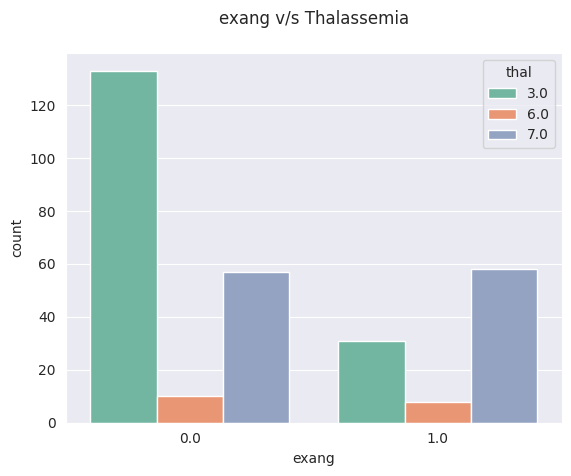

In [104]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

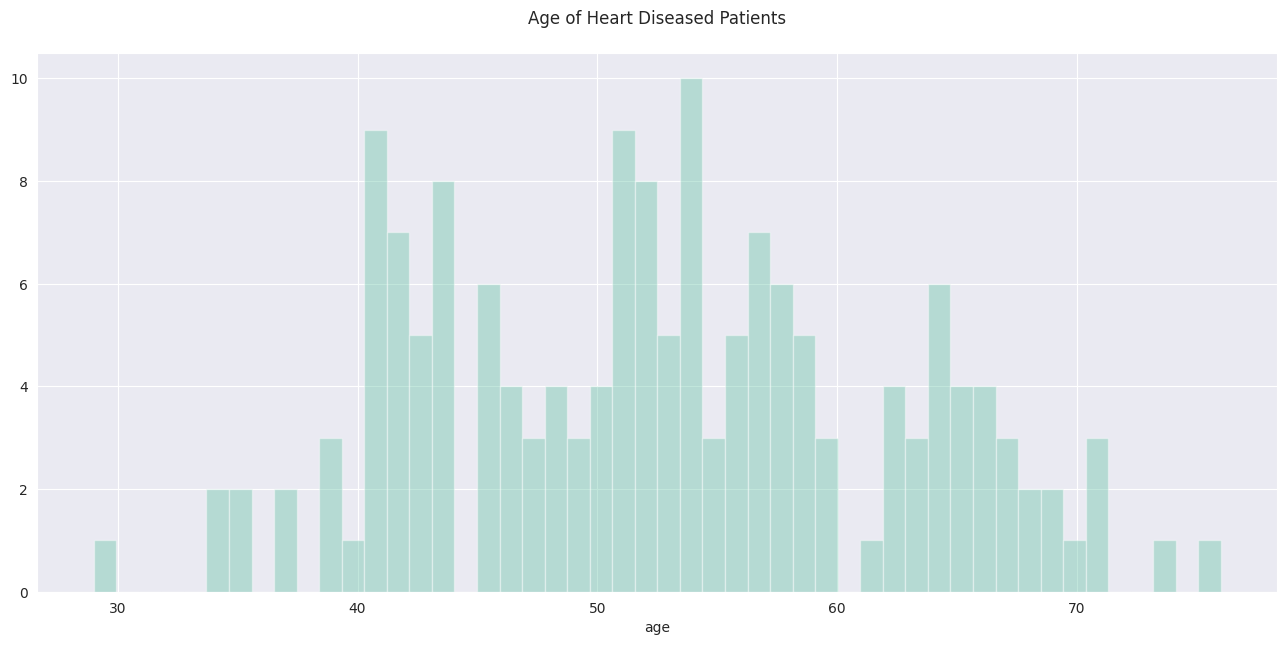

In [105]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['num']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

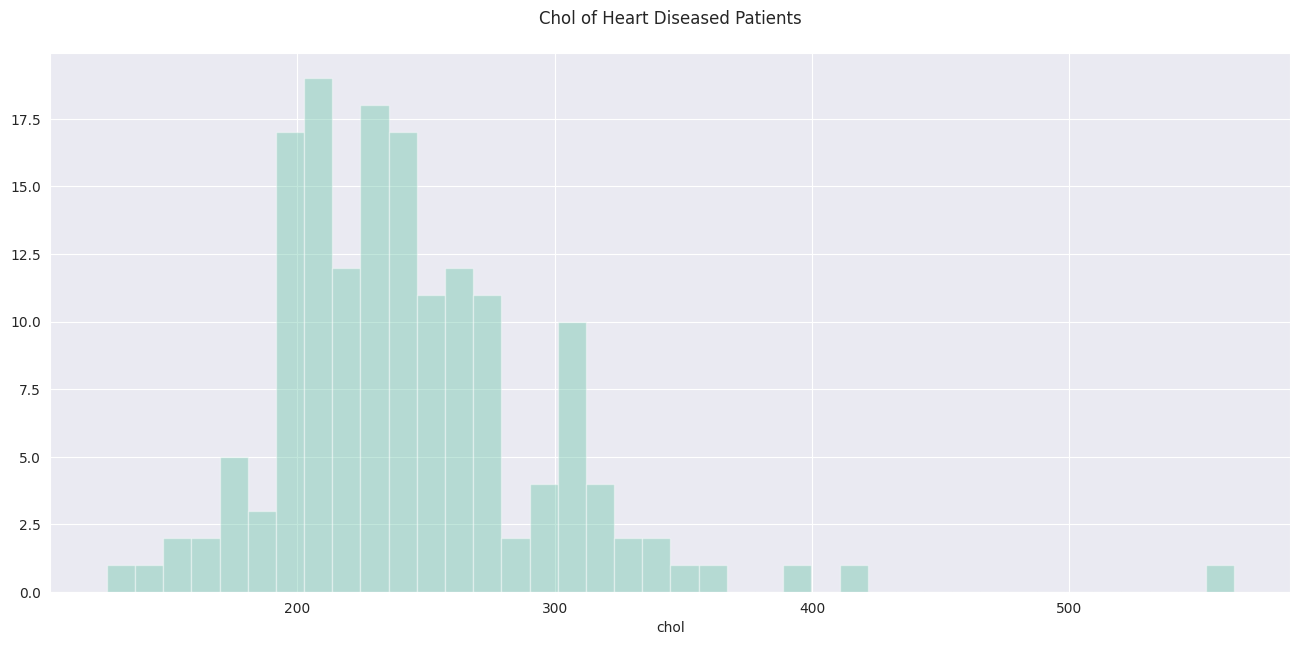

In [106]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['num']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

In [110]:
df3 = df[df['num'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


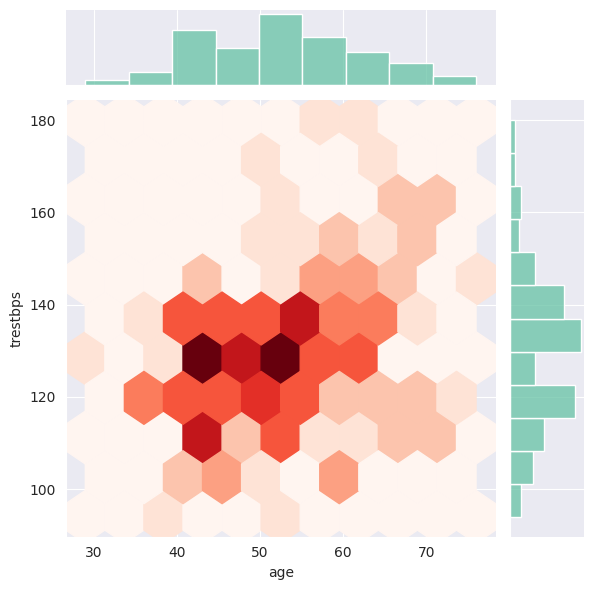

In [111]:

pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )

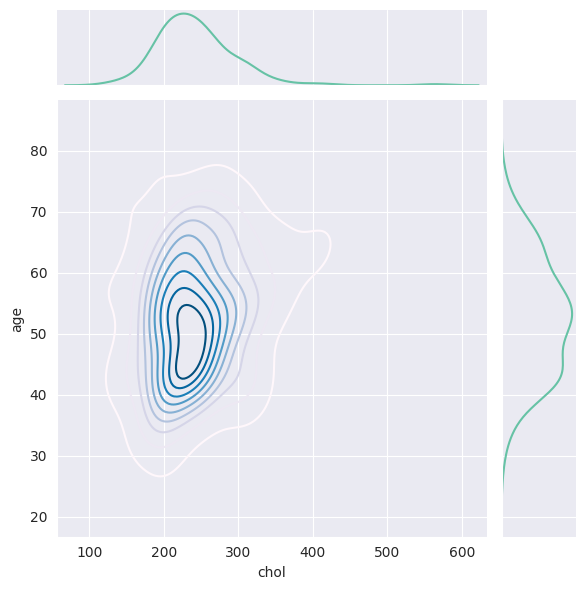

In [112]:

sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

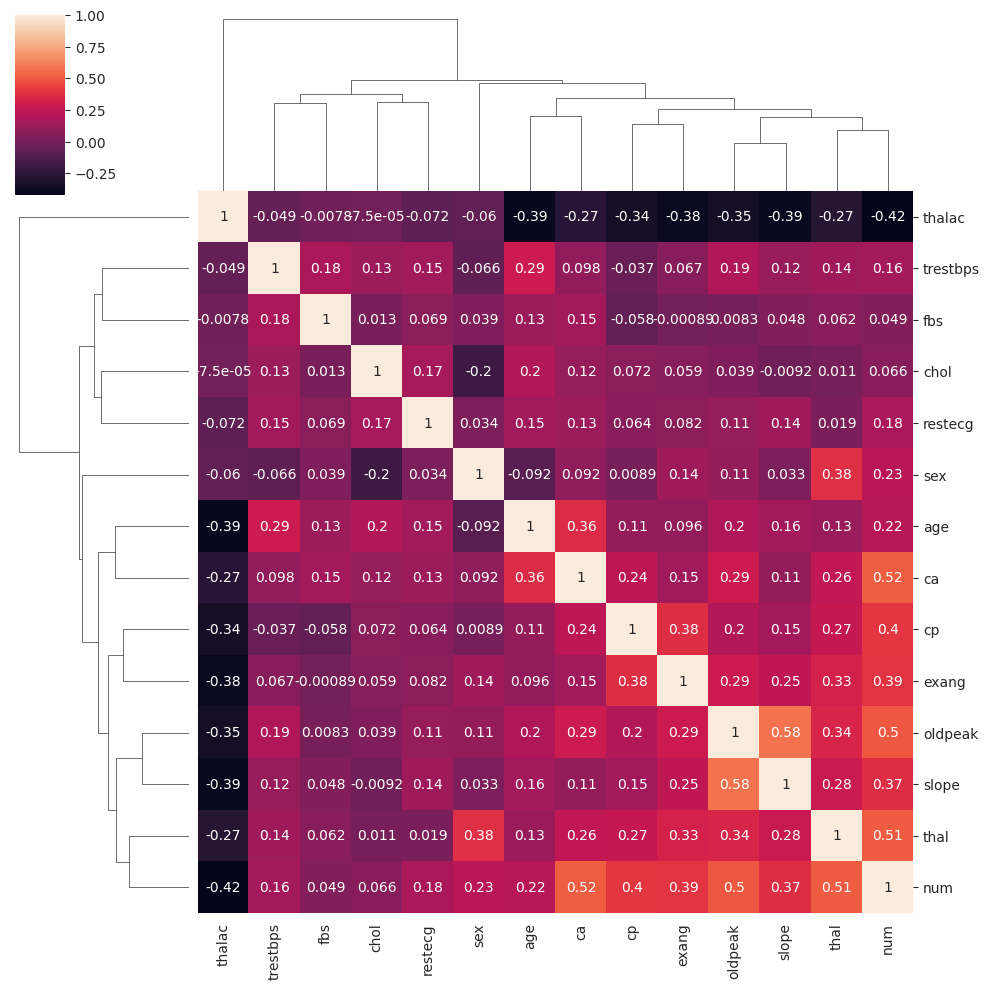

In [113]:
sns.clustermap(df.corr(),annot=True)

In [116]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [117]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [118]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63.0,1.0,atypical angina,145.0,233.0,1.0,ST-T wave abnormality,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,ST-T wave abnormality,108.0,1.0,1.5,upsloping,3.0,reversable defect,2
2,67.0,1.0,4.0,120.0,229.0,0.0,ST-T wave abnormality,129.0,1.0,2.6,upsloping,2.0,7.0,1
3,37.0,1.0,typical angina,130.0,250.0,0.0,left ventricular hypertrophy,187.0,0.0,3.5,3.0,0.0,reversable defect,0
4,41.0,0.0,non-anginal pain,130.0,204.0,0.0,ST-T wave abnormality,172.0,0.0,1.4,flat,0.0,reversable defect,0


In [119]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_4.0', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_3.0', 'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_6.0', 'thalassemia_type_7.0',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [121]:
data = pd.get_dummies(df, drop_first=True)

In [122]:
data.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_7.0,thalassemia_type_reversable defect
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,1,0,0,0,0,0,0,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,0,0,0,0,0,0,1,0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,0,0,0,0,0,0,1,1,0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,0,1,1,0,0,0,0,1
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,0,1,0,0,0,1,0,0,1


In [125]:
df_temp = data['thalassemia_type_7.0']

In [126]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_7.0,thalassemia_type_reversable defect,thalassemia_type_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,1,0,0,0,0,0,0,0,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,0,0,0,0,0,0,1,0,1,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,0,0,0,0,0,0,1,1,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,0,1,1,0,0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,0,1,0,0,0,1,0,0,1,0


In [128]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping', 'thalassemia_type_7.0',
       'thalassemia_type_reversable defect', 'thalassemia_type_7.0'],
      dtype='object')

In [130]:
X = result.drop('target', axis = 1)

In [131]:
y = result['target']

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [134]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [137]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [138]:
y_pred = logre.predict(X_test)

In [139]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [140]:
result  = pd.DataFrame(dic)

In [141]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

In [142]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.5833333333333334


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.70      0.93      0.80        30
           1       0.33      0.17      0.22        12
           2       0.25      0.29      0.27         7
           3       0.50      0.50      0.50         6
           4       0.00      0.00      0.00         5

    accuracy                           0.58        60
   macro avg       0.36      0.38      0.36        60
weighted avg       0.50      0.58      0.53        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[[28  1  1  0  0]
 [ 8  2  1  1  0]
 [ 2  1  2  2  0]
 [ 0  0  3  3  0]
 [ 2  2  1  0  0]]


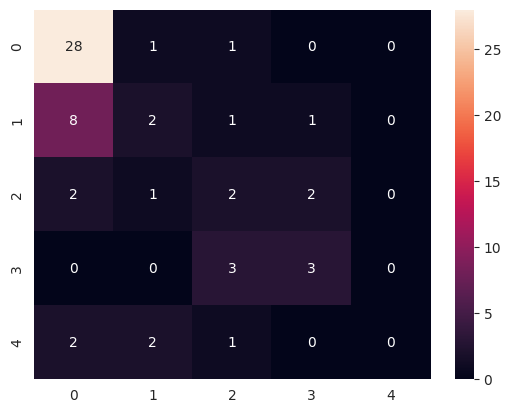

In [144]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)